In [1]:
import pandas as pd
import load_data

In [2]:
df = load_data.get_df()

In [3]:
df.shape

(426, 3)

In [4]:
df.columns

Index(['URLS', 'Headline', 'Article'], dtype='object')

In [5]:
df.head()

,URLS,Headline,Article
0,/business/economy/opinion/news/averting-fiscal...,Averting fiscal crises in a deteriorating glob...,The war in Ukraine and aftershocks from the Co...
1,/opinion/views/news/remembering-the-queens-leg...,"In remembering the 'Queen's legacy', why do we...",When news broke of the death of Queen Elizabet...
2,/news/bangladesh/news/temple-idol-vandalised-j...,Temple idol vandalised in Jhenidah,Unidentified miscreants vandalised an idol of ...
3,/news/bangladesh/crime-justice/news/attack-bcl...,"""Attack on BCL men"": 24 Chhatra Odhikar Parish...",A Dhaka court has sent 24 leaders and activist...
4,/opinion/views/news/shanghai-cooperation-organ...,Shanghai Cooperation Organization Summit 2022:...,The Shanghai Cooperation Organization's (SCO) ...


#### Preliminary text exploration

In [6]:
# Fetch the word_cound for each headline
df['word_count_headline'] = df['Headline'].apply(
    lambda x: len(str(x).split(" "))
)

In [7]:
df[['Headline','word_count_headline']].head(10)

,Headline,word_count_headline
0,Averting fiscal crises in a deteriorating glob...,9
1,"In remembering the 'Queen's legacy', why do we...",14
2,Temple idol vandalised in Jhenidah,5
3,"""Attack on BCL men"": 24 Chhatra Odhikar Parish...",12
4,Shanghai Cooperation Organization Summit 2022:...,9
5,Hoolock rescued in Ctg; 2 detained,6
6,4 killed in Gopalganj road crash,7
7,An unusual gift for Putin on his 70th birthday,9
8,Seminar on managing pain held,5
9,OPEC+ oil output cut shows widening rift betwe...,12


In [8]:
df.word_count_headline.value_counts()

7     63
8     62
9     58
5     56
6     48
10    44
11    25
12    20
4     17
13    10
3      9
14     6
2      3
16     2
17     1
15     1
21     1
Name: word_count_headline, dtype: int64

In [9]:
df.word_count_headline.describe()

count    426.000000
mean       7.938967
std        2.672040
min        2.000000
25%        6.000000
50%        8.000000
75%       10.000000
max       21.000000
Name: word_count_headline, dtype: float64

#### Most common and uncommon words

In [10]:
# Identify common words
freq = pd.Series(' '.join(df['Headline']).split()).value_counts()[:20]

In [11]:
freq

in            96
to            92
of            62
for           54
the           37
on            33
a             24
at            24
after         21
with          20
and           17
Bangladesh    16
as            15
2             15
killed        14
from          13
by            13
more          11
US             9
World          9
dtype: int64

In [12]:
# Identify uncommon words 
# Identify common words
freq = pd.Series(' '.join(df['Headline']).split()).value_counts()[-20:]

In [13]:
freq

lens           1
Asaf’s         1
happy’         1
very           1
captain,       1
‘As            1
tomorrow       1
nine           1
struggling     1
kills          1
blast          1
station        1
petrol         1
Ireland        1
discovered     1
Bangladesh,    1
chairman       1
UP             1
ground         1
2021-22        1
dtype: int64

#### Text Preprocessing

In [14]:
# Importing dependencies
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

In [15]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also",
             "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [16]:
df.reset_index(inplace=True)
corpus = []
for i in range(0, 426):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', df['Headline'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [17]:
corpus[3]

'attack bcl men chhatra odhikar parishad activist sent jail'

#### Data Exploration

In [20]:
# Word Cloud
from os import path 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
wordcloud = WordCloud(
    background_color='white',
    stopwords=stop_words,
    max_words=50,
    max_font_size=50,
    random_state=42
).generate(str(corpus))

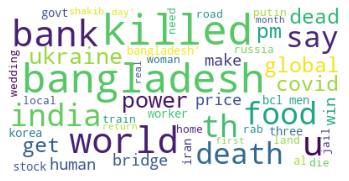

In [24]:
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [25]:
fig.savefig("word1.png", dpi=900)

#### Text Preparation
- Tokenization
- Vectorization

#### Creating a vector of word counts

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
cv = CountVectorizer(
    max_df=0.8,
    stop_words=stop_words,
    max_features=1000,
    ngram_range=(1,3)
)

In [28]:
X = cv.fit_transform(corpus)

In [30]:
list(cv.vocabulary_.keys())[:10]

['crisis',
 'global',
 'economic',
 'environment',
 'remembering',
 'queen',
 'suffering',
 'queen legacy',
 'queen legacy forget',
 'attack']

#### Visualizing top N uni-grams,bi-grames and tri_grams

[Text(0, 0, 'bangladesh'),
 Text(1, 0, 'killed'),
 Text(2, 0, 'world'),
 Text(3, 0, 'bank'),
 Text(4, 0, 'india'),
 Text(5, 0, 'death'),
 Text(6, 0, 'th'),
 Text(7, 0, 'iran'),
 Text(8, 0, 'covid'),
 Text(9, 0, 'win'),
 Text(10, 0, 'food'),
 Text(11, 0, 'day'),
 Text(12, 0, 'men'),
 Text(13, 0, 'bridge'),
 Text(14, 0, 'year'),
 Text(15, 0, 'arrested'),
 Text(16, 0, 'say'),
 Text(17, 0, 'price'),
 Text(18, 0, 'pm'),
 Text(19, 0, 'ukraine')]

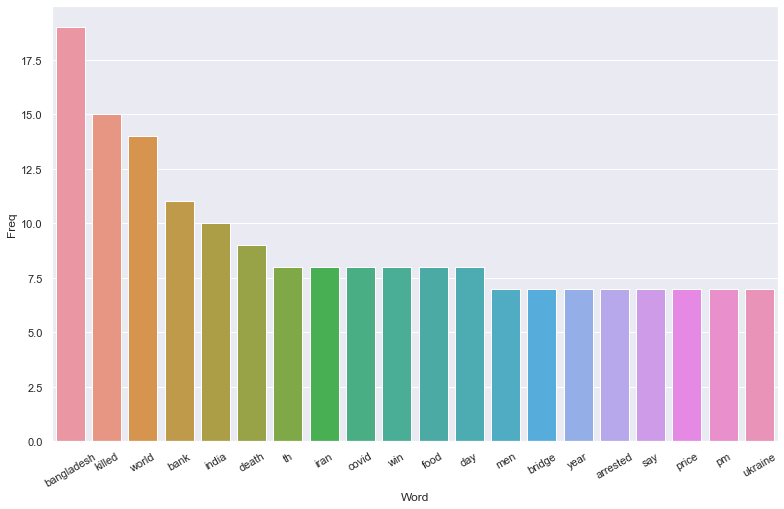

In [33]:
# Most frequently occuring words
import seaborn as sns


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)

    sum_words = bag_of_words.sum(axis=0)

    words_freq = [
        (word, sum_words[0, idx]) for word, idx in
        vec.vocabulary_.items()
    ]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns = ["Word", "Freq"]

#Barplot of most freq words
sns.set(rc={'figure.figsize': (13, 8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

              Bi-gram  Freq
0             bcl men     5
1       mental health     5
2           world cup     4
3           pass away     4
4     chhatra odhikar     3
5    odhikar parishad     3
6          road crash     3
7            year old     3
8     positivity rate     3
9         nobel prize     3
10      home ministry     3
11        murder case     3
12  parishad activist     2
13        th birthday     2
14         output cut     2
15           cut show     2
16         rift biden     2
17        biden saudi     2
18        saudi royal     2
19          die covid     2


[Text(0, 0, 'bcl men'),
 Text(1, 0, 'mental health'),
 Text(2, 0, 'world cup'),
 Text(3, 0, 'pass away'),
 Text(4, 0, 'chhatra odhikar'),
 Text(5, 0, 'odhikar parishad'),
 Text(6, 0, 'road crash'),
 Text(7, 0, 'year old'),
 Text(8, 0, 'positivity rate'),
 Text(9, 0, 'nobel prize'),
 Text(10, 0, 'home ministry'),
 Text(11, 0, 'murder case'),
 Text(12, 0, 'parishad activist'),
 Text(13, 0, 'th birthday'),
 Text(14, 0, 'output cut'),
 Text(15, 0, 'cut show'),
 Text(16, 0, 'rift biden'),
 Text(17, 0, 'biden saudi'),
 Text(18, 0, 'saudi royal'),
 Text(19, 0, 'die covid')]

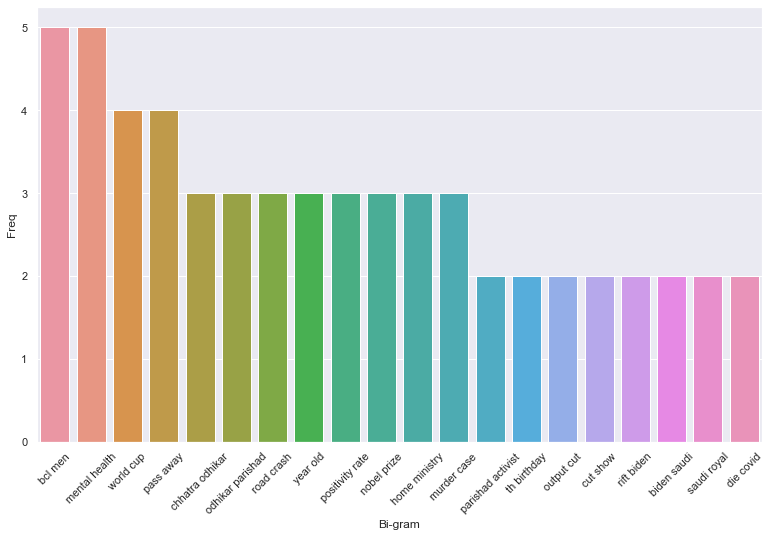

In [34]:
#Most frequently occuring Bi-grams

def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2, 2),
                           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize': (13, 8)})
h = sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)


                      Tri-gram  Freq
0     chhatra odhikar parishad     3
1    odhikar parishad activist     2
2              output cut show     2
3             rift biden saudi     2
4            biden saudi royal     2
5   bangladesh wedding couture     2
6         wedding couture week     2
7            couture week bwcw     2
8            killed road crash     2
9          dengue grip rooppur     2
10          grip rooppur plant     2
11      bangladeshi killed bsf     2
12                 top la liga     2
13          hr positivity rate     2
14         strike ukraine city     2
15          dengue fever death     2
16    fever death hospitalised     2
17     death hospitalised hour     2
18           mahsa amini death     2
19            city bank launch     2


[Text(0, 0, 'chhatra odhikar parishad'),
 Text(1, 0, 'odhikar parishad activist'),
 Text(2, 0, 'output cut show'),
 Text(3, 0, 'rift biden saudi'),
 Text(4, 0, 'biden saudi royal'),
 Text(5, 0, 'bangladesh wedding couture'),
 Text(6, 0, 'wedding couture week'),
 Text(7, 0, 'couture week bwcw'),
 Text(8, 0, 'killed road crash'),
 Text(9, 0, 'dengue grip rooppur'),
 Text(10, 0, 'grip rooppur plant'),
 Text(11, 0, 'bangladeshi killed bsf'),
 Text(12, 0, 'top la liga'),
 Text(13, 0, 'hr positivity rate'),
 Text(14, 0, 'strike ukraine city'),
 Text(15, 0, 'dengue fever death'),
 Text(16, 0, 'fever death hospitalised'),
 Text(17, 0, 'death hospitalised hour'),
 Text(18, 0, 'mahsa amini death'),
 Text(19, 0, 'city bank launch')]

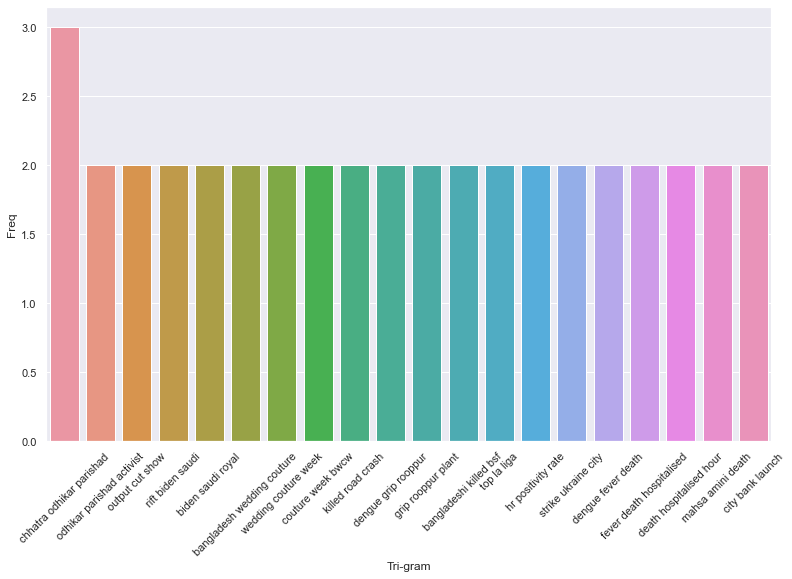

In [36]:
#Most frequently occuring Tri-grams

def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3, 3),
                           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
sns.set(rc={'figure.figsize': (13, 8)})
j = sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)


#### Converting to a Matrix of Integers
- TF-IDF

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(
    smooth_idf=True,
    use_idf=True
)

tfidf_transformer.fit(X)

TfidfTransformer()

In [40]:
# Get feature names
feature_names = cv.get_feature_names_out()